# Délicieuses cuisines asiatiques et indiennes

## Introduction

La cuisine asiatique et indienne est connue pour ses saveurs riches, ses épices uniques et ses techniques de cuisson variées. Que vous soyez amateur de plats épicés ou que vous préfériez des saveurs plus douces, il y a quelque chose pour tout le monde.

## Pourquoi choisir ces cuisines ?

- **Diversité des saveurs** : Chaque région a ses propres spécialités, offrant une grande variété de plats.
- **Utilisation d'ingrédients frais** : Les légumes, les herbes et les épices sont souvent utilisés dans leur forme la plus fraîche.
- **Options végétariennes** : Ces cuisines proposent de nombreuses options pour les végétariens et les végétaliens.

[!NOTE] Ces cuisines sont également adaptées à ceux qui aiment expérimenter avec des saveurs nouvelles et audacieuses.

## Plats populaires

### Cuisine asiatique

1. **Sushi** : Une combinaison de riz vinaigré, de poisson cru et parfois de légumes.
2. **Pad Thaï** : Un plat de nouilles sautées avec des œufs, des cacahuètes, et une sauce sucrée-salée.
3. **Dim Sum** : Petits plats cuits à la vapeur, souvent servis dans des paniers en bambou.

### Cuisine indienne

1. **Poulet Tikka Masala** : Poulet mariné dans des épices et cuit dans une sauce crémeuse à la tomate.
2. **Biryani** : Riz épicé mélangé avec de la viande, des légumes ou des œufs.
3. **Chole Bhature** : Pois chiches épicés servis avec un pain frit moelleux.

[!TIP] Essayez de préparer ces plats à la maison pour une expérience culinaire enrichissante !

## Conseils pour cuisiner

- **Soyez patient avec les épices** : Ajoutez-les progressivement pour équilibrer les saveurs.
- **Investissez dans des ustensiles adaptés** : Un wok ou une cocotte peut faire toute la différence.
- **Goûtez au fur et à mesure** : Ajustez les assaisonnements selon vos préférences.

[!WARNING] Certaines épices peuvent être très fortes. Utilisez-les avec modération si vous n'êtes pas habitué.

## Conclusion

La cuisine asiatique et indienne offre une expérience culinaire inoubliable. Que vous choisissiez de dîner dans un restaurant ou de cuisiner à la maison, ces plats sont sûrs de ravir vos papilles. Alors, pourquoi ne pas essayer quelque chose de nouveau aujourd'hui ?


Installez Imblearn qui activera SMOTE. Il s'agit d'un package Scikit-learn qui aide à gérer les données déséquilibrées lors de la classification. (https://imbalanced-learn.org/stable/)


In [1]:
pip install imblearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df  = pd.read_csv('../../data/cuisines.csv')

Ce jeu de données comprend 385 colonnes indiquant toutes sortes d'ingrédients dans diverses cuisines d'un ensemble donné de cuisines.


In [4]:
df.head()

Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0         0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 385 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [6]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

Afficher les cuisines dans un graphique en barres


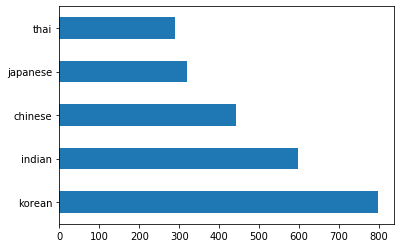

In [7]:
df.cuisine.value_counts().plot.barh()

In [8]:

thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
def create_ingredient_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort df
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df


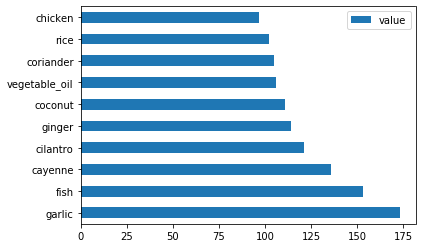

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

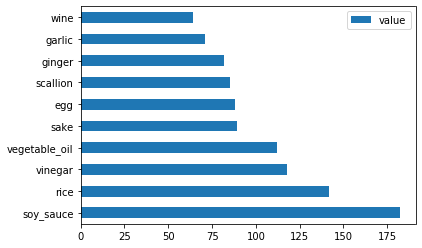

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

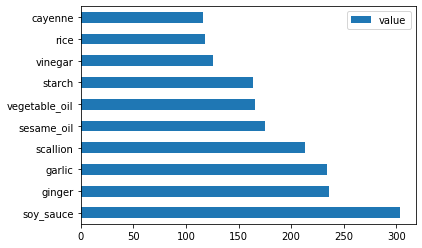

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

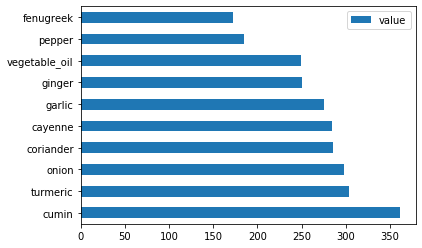

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

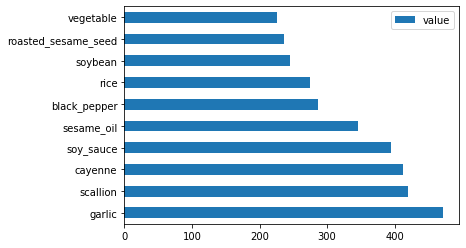

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()


almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

Équilibrez les données avec le suréchantillonnage SMOTE jusqu'à la classe la plus élevée. En savoir plus ici : https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html


In [16]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [17]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: korean      799
chinese     799
japanese    799
indian      799
thai        799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [18]:
transformed_feature_df.head()

almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

In [19]:
# export transformed data to new df for classification
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0     indian       0         0      0           0      0             0   
1     indian       1         0      0           0      0             0   
2     indian       0         0      0           0      0             0   
3     indian       0         0      0           0      0             0   
4     indian       0         0      0           0      0             0   
...      ...     ...       ...    ...         ...    ...           ...   
3990    thai       0         0      0           0      0             0   
3991    thai       0         0      0           0      0             0   
3992    thai       0         0      0           0      0             0   
3993    thai       0         0      0           0      0             0   
3994    thai       0         0      0           0      0             0   

      apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
0           0         0          0  ...        0            0           0   
1           0         0          0  ...        0            0           0   
2           0         0          0  ...        0            0           0   
3           0         0          0  ...        0            0           0   
4           0         0          0  ...        0            0           0   
...       ...       ...        ...  ...      ...          ...         ...   
3990        0         0          0  ...        0            0           0   
3991        0         0          0  ...        0            0           0   
3992        0         0          0  ...        0            0           0   
3993        0         0          0  ...        0            0           0   
3994        0         0          0  ...        0            0           0   

      whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                           0     0     0    0      0       0         0  
1                           0     0     0    0      0       0         0  
2                           0     0     0    0      0       0         0  
3                           0     0     0    0      0       0         0  
4                           0     0     0    0      0       1         0  
...                       ...   ...   ...  ...    ...     ...       ...  
3990                        0     0     0    0      0       0         0  
3991                        0     0     0    0      0       0         0  
3992                        0     0     0    0      0       0         0  
3993                        0     0     0    0      0       0         0  
3994                        0     0     0    0      0       0         0  

[3995 rows x 381 columns]

In [20]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


Enregistrez le fichier pour une utilisation future


In [21]:
transformed_df.to_csv("../../data/cleaned_cuisines.csv")


---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de faire appel à une traduction humaine professionnelle. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
